## 1 - CM3710 - KNN

In [39]:
# Import Libraries 
import sklearn 
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.read_csv("Tension_num_cat.csv", header=0) #read file in using pandas to create a data frame

#print(df.head(5))#view the first 5 rows of the data frame 
#print(df.shape)# view the shape columns/rows of the data frame. Can see we have 3601 rows and 13 columns.

In [41]:
x = df.drop('Num Category', axis = 'columns') #create a variable with everything but the target value, called x. 

y = df['Num Category'].values #create a variable with only the target variable - num category 1=low, 2=med, 3=high


#print(y)
#print (x.head(5)) # have a look to ensure that the correct column has been dropped. 
#print (x.shape) # secondary check to ensure that we now have 12 columns from original 13
#print (y.head(5)) # have a look to ensure that the text category column remains
#print (y.shape) # secondary check to ensure that we now have 1 column from 13 and all 3601 rows remain
#plt.hist(y, bins = 3) #quick visual check to ensure we've not got any other values that we arent expecting in our target column


In [62]:
#create the knn model and use cross validation to split the data to affect train/test sets. create a set of predicted values for y for knn model
knn_model = KNeighborsClassifier(n_neighbors = 13)
y_knn_predicted = cross_val_predict(knn_model, x, y, cv=2)

In [74]:
# R2, MSE and F1 Scores along with Classification report for the KNN algorithm. 

R2_knn = r2_score(y,y_knn_predicted)
MSE_knn = mean_squared_error(y,y_knn_predicted)
F1_knn = f1_score(y, y_knn_predicted, average='weighted')
AScore_knn = accuracy_score(y, y_knn_predicted)

print("\nAccuracy Score = ", AScore_knn*100,"%")
print("\nR Squared score = ",R2_knn)
print("\nMean Squared Error = ", MSE_knn)
print("\nF1 Score = ", F1_knn)

target_names = ["low", "med", "high"]
print("\n\n",classification_report(y,y_knn_predicted, target_names=target_names))


Accuracy Score =  88.3921133018606 %

R Squared score =  0.5398853416355356

Mean Squared Error =  0.15940016662038323

F1 Score =  0.8820582564885823


               precision    recall  f1-score   support

         low       0.83      0.78      0.80       504
         med       0.90      0.95      0.92      2335
        high       0.86      0.76      0.81       762

    accuracy                           0.88      3601
   macro avg       0.86      0.83      0.84      3601
weighted avg       0.88      0.88      0.88      3601



In [86]:
#check mean squared errors between 1 and 49 nearest neighbours 
knn_mse = []
k_range = range(1,49)
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    y_knn_predicted = cross_val_predict(knn_model, x, y, cv=2)
    knn_mse.append(mean_squared_error(y, y_knn_predicted))
   

In [87]:
#check f1 score between 1 and 49 nearest neighbours 
knn_f1 = []
k_range = range(1,49)
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    y_knn_predicted = cross_val_predict(knn_model, x, y, cv=2)
    knn_f1.append(f1_score(y, y_knn_predicted,average='weighted'))


In [88]:
#check r squared errors between 1 and 49 nearest neighbours
knn_r2 = []
k_range = range(1,49)
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    y_knn_predicted = cross_val_predict(knn_model, x, y, cv=2)
    knn_r2.append(r2_score(y, y_knn_predicted))


In [89]:
#check Accuracy Score errors between 1 and 49 nearest neighbours
knn_Ascore = []
k_range = range(1,49)
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    y_knn_predicted = cross_val_predict(knn_model, x, y, cv=2)
    knn_Ascore.append(accuracy_score(y, y_knn_predicted))

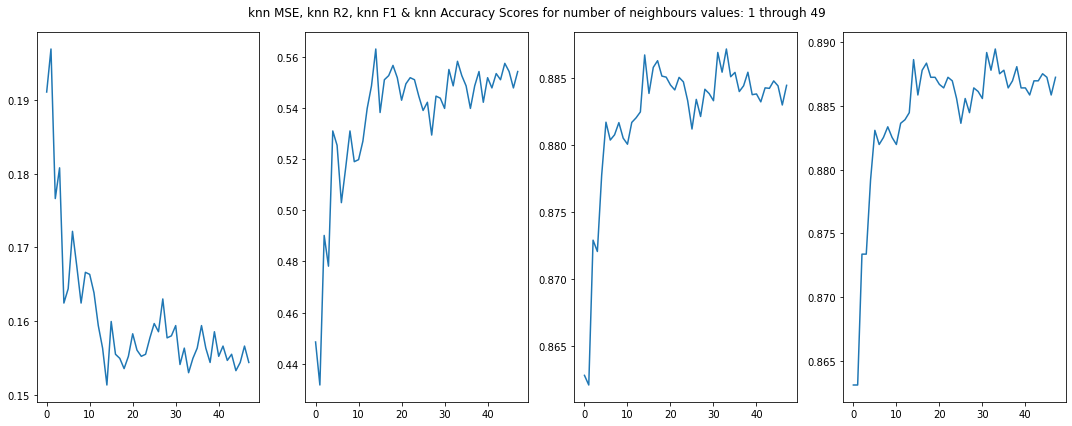

In [97]:
#Plot Scores - TAKES A SEC TO RUN
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,6))
fig.suptitle('knn MSE, knn R2, knn F1 & knn Accuracy Scores for number of neighbours values: 1 through 49')
ax1.plot(knn_mse)
ax2.plot(knn_r2)
ax3.plot(knn_f1)
ax4.plot(knn_Ascore)
plt.tight_layout()

Text(33.0, 0.5, 'Actual')

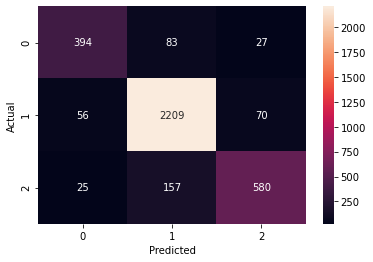

In [126]:
#create a confusion matrix to visualise the accuracy of the model. 
confusion_matrix_knn = confusion_matrix(y, y_predicted)
plt.figure(figsize=(6,4))
sn.heatmap(confusion_matrix_knn,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 2 - CM3710 - Decision Tree

In [16]:
#create train test split data sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123) # 20% for testing

#print("X TRAIN = ", x_train.shape, "\nX TEST = ", x_test.shape, "\nY TRAIN = ", y_train.shape, "\nY TEST = ", y_test.shape )

In [17]:
#create and train model using training data then make predictions using the test data. 
tree_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = 6, min_samples_leaf=3)
tree_model.fit(x_train,y_train)
y_tree_predicted = tree_model.predict(x_test)

In [77]:
#define and print the various performance metrics available along with the classifcation report for the inital model. 

R2_tree = r2_score(y_test,y_tree_predicted)
MSE_tree = mean_squared_error(y_test,y_tree_predicted)
F1_tree = f1_score(y_test, y_tree_predicted, average='weighted')
AScore_tree = accuracy_score(y_test, y_tree_predicted)

print("\nAccuracy Score = ", AScore_tree*100,"%")
print("\nR Squared score = ",R2_tree)
print("\nMean Squared Error = ", MSE_tree)
print("\nF1 Score = ", F1_tree)

target_names = ["low", "med", "high"]
print("\n\n",classification_report(y_test,y_tree_predicted, target_names=target_names))


Accuracy Score =  87.79472954230236 %

R Squared score =  0.5039686600939288

Mean Squared Error =  0.1678224687933426

F1 Score =  0.8785584683641815


               precision    recall  f1-score   support

         low       0.77      0.82      0.79       100
         med       0.93      0.91      0.92       474
        high       0.81      0.81      0.81       147

    accuracy                           0.88       721
   macro avg       0.83      0.85      0.84       721
weighted avg       0.88      0.88      0.88       721



In [119]:
# investigate what value to use for max depth to achieve the best mean squared error.
tree_mse = []
k_range = range(1,49)
for i in k_range:
    tree_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = i, min_samples_leaf=3)
    tree_model.fit(x_train, y_train)
    y_tree_predicted = tree_model.predict(x_test)
    tree_mse.append(mean_squared_error(y_test,y_tree_predicted))

In [120]:
# investigate what value to use for max depth to achieve the best f1 score. 
tree_f1 = []
k_range = range(1,49)
for i in k_range:
    tree_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = i, min_samples_leaf=3)
    tree_model.fit(x_train, y_train)
    y_tree_predicted = tree_model.predict(x_test)
    tree_f1.append(f1_score(y_test,y_tree_predicted,average='weighted'))

In [121]:
# investigate what value to use for max depth to achieve the best r squared value.
tree_r2 = []
k_range = range(1,49)
for i in k_range:
    tree_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = i, min_samples_leaf=3)
    tree_model.fit(x_train, y_train)
    y_tree_predicted = tree_model.predict(x_test)
    tree_r2.append(r2_score(y_test,y_tree_predicted))

In [122]:
# investigate what value to use for max depth to achieve the best accuracy score.
tree_Ascore = []
k_range = range(1,49)
for i in k_range:
    tree_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = i, min_samples_leaf=3)
    tree_model.fit(x_train, y_train)
    y_tree_predicted = tree_model.predict(x_test)
    tree_Ascore.append(accuracy_score(y_test,y_tree_predicted))

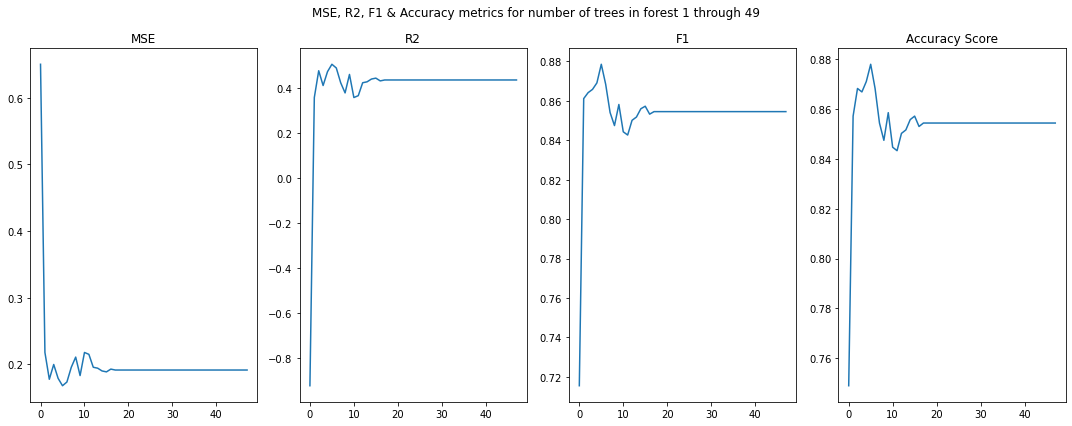

In [123]:
#Plot metrics for decision tree - TAKES A SEC TO RUN
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,6))
fig.suptitle('MSE, R2, F1 & Accuracy metrics for number of trees in forest 1 through 49')
ax1.plot(tree_mse)
ax2.plot(tree_r2)
ax3.plot(tree_f1)
ax4.plot(tree_Ascore)
ax1.title.set_text('MSE')
ax2.title.set_text('R2')
ax3.title.set_text('F1')
ax4.title.set_text('Accuracy Score')
plt.tight_layout()

Text(33.0, 0.5, 'Actual')

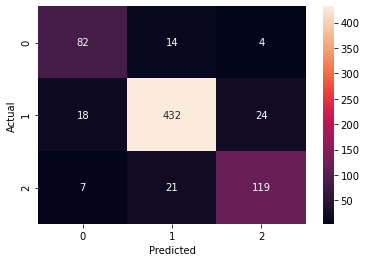

In [22]:
#create a confusion matrix to visualise the accuracy of the model. 
confusion_matrix_decision_tree = confusion_matrix(y_test, y_tree_predicted)
plt.figure(figsize=(6,4))
sn.heatmap(confusion_matrix_decision_tree,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

<AxesSubplot:>

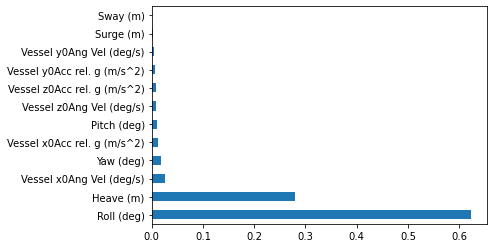

In [116]:
#Look at pandas feature importance data to define which features are having the most impact on tension low,med,high
feat_importances_tree = pd.Series(tree_model.feature_importances_, index=x.columns)
feat_importances_tree.nlargest(12).plot(kind='barh')

## 3 - CM3710 - Random Forest

In [79]:
#create a model using the random forrest algorithm. Using the existing train/test datasets. 
forest_model = RandomForestClassifier(criterion = 'gini', n_estimators = 30) #define the model
forest_model.fit(x_train, y_train) #train the model
y_forest_predicted = forest_model.predict(x_test) # make predictions based on test data

In [124]:
#define and print the various performance metrics available along with the classifcation report for the inital model. 

R2_forest = r2_score(y_test,y_forest_predicted)
MSE_forest = mean_squared_error(y_test,y_forest_predicted)
F1_forest = f1_score(y_test, y_forest_predicted, average='weighted')
AScore_forest = accuracy_score(y_test, y_forest_predicted)

print("\nAccuracy Score = ", AScore_forest*100,"%")
print("\nR Squared score = ",R2_forest)
print("\nMean Squared Error = ", MSE_forest)
print("\nF1 Score = ", F1_forest)

target_names = ["low", "med", "high"]
print("\n\n",classification_report(y_test,y_forest_predicted, target_names=target_names))


Accuracy Score =  89.32038834951457 %

R Squared score =  0.6228522043689375

Mean Squared Error =  0.1276005547850208

F1 Score =  0.8920461140976474


               precision    recall  f1-score   support

         low       0.83      0.81      0.82       100
         med       0.91      0.94      0.93       474
        high       0.89      0.79      0.83       147

    accuracy                           0.89       721
   macro avg       0.87      0.85      0.86       721
weighted avg       0.89      0.89      0.89       721



In [106]:
#investigate the number of trees in the forest to achieve the best mean squared error.
forest_mse = []
k_range = range(1,49)
for i in k_range:
    forest_model = RandomForestClassifier(criterion = 'gini', n_estimators = i)
    forest_model.fit(x_train, y_train)
    y_forest_predicted = forest_model.predict(x_test)
    forest_mse.append(mean_squared_error(y_test,y_forest_predicted))

In [107]:
#investigate the number of trees in the forest to achieve the best f1 score.
forest_f1 = []
k_range = range(1,49)
for i in k_range:
    forest_model = RandomForestClassifier(criterion = 'gini', n_estimators = i)
    forest_model.fit(x_train, y_train)
    y_forest_predicted = forest_model.predict(x_test)
    forest_f1.append(f1_score(y_test,y_forest_predicted,average='weighted'))

In [108]:
#investigate the number of trees in the forest to achieve the best r2 score.
forest_r2 = []
k_range = range(1,49)
for i in k_range:
    forest_model = RandomForestClassifier(criterion = 'gini', n_estimators = i)
    forest_model.fit(x_train, y_train)
    y_forest_predicted = forest_model.predict(x_test)
    forest_r2.append(r2_score(y_test,y_forest_predicted))

In [109]:
#investigate the number of trees in the forest to achieve the best Accuracy Score.
forest_Ascore = []
k_range = range(1,49)
for i in k_range:
    forest_model = RandomForestClassifier(criterion = 'gini', n_estimators = i)
    forest_model.fit(x_train, y_train)
    y_forest_predicted = forest_model.predict(x_test)
    forest_Ascore.append(accuracy_score(y_test,y_forest_predicted))

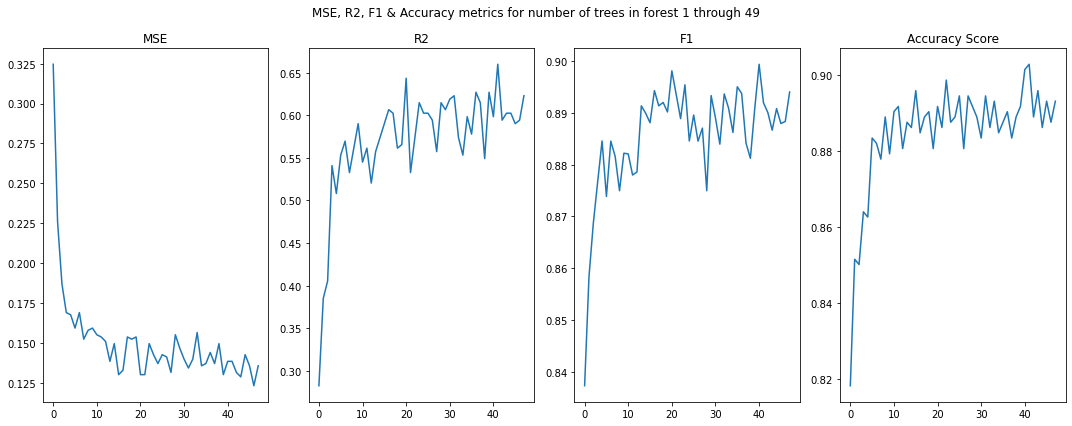

In [114]:
#Plot metrics for random forest - TAKES A SEC TO RUN
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,6))
fig.suptitle('MSE, R2, F1 & Accuracy metrics for number of trees in forest 1 through 49')
ax1.plot(forest_mse)
ax2.plot(forest_r2)
ax3.plot(forest_f1)
ax4.plot(forest_Ascore)
ax1.title.set_text('MSE')
ax2.title.set_text('R2')
ax3.title.set_text('F1')
ax4.title.set_text('Accuracy Score')
plt.tight_layout()


Text(33.0, 0.5, 'Actual')

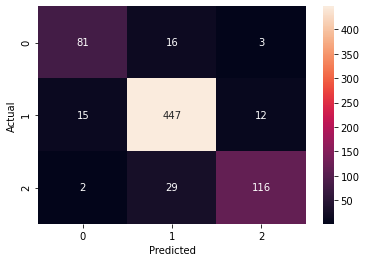

In [125]:
#Create a confusion matrix to visualist the accuracy of the random forest model
confusion_matrix_forest = confusion_matrix(y_test, y_forest_predicted)
plt.figure(figsize=(6,4))
sn.heatmap(confusion_matrix_forest,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

<AxesSubplot:>

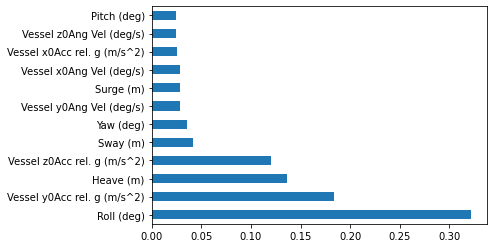

In [115]:
#Look at pandas feature importance data to define which features are having the most impact on tension low,med,high
feat_importances_forest = pd.Series(forest_model.feature_importances_, index=x.columns)
feat_importances_forest.nlargest(12).plot(kind='barh')